### Exploratory data analysis (10pts)

There are 5 parts in this notebook. 
For each analysis, we provide some examples for you to follow. Your task is to conduct your own analysis following the logics provided in the examples, maked as "Your task".

- **Part-1: Data overview**
    > check the #samples, #attributes <br>
    > attribute types <br>
    
- **Part-2: Data cleaning**
    > organize attributes into appripriate data types (e.g., numerical, categorical, datatime, text, image, ...) <br>
    > missing value and outlier detection <br>
    
- **Part-3: Data transformation**
    > normalize numerical data <br>
    > transform text data: tokenization, stemming, and lemmatization <br>
    
- **Part-4: Feature engineering**
    > encode categorical data <br>
    > convert DataTime data <br>
    > text feature representation <br>

- **Part-5: Additional analysis**
    > create new features <br>
    > colinearty check <br>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data overview

In [95]:
# read data from file to a pandas dataframe
data_df = pd.read_feather('./house_sales.ftr') 

In [96]:
# check the shape of the data frame: row: #samples (short for number of samples), column: #attributes (short for number of attributes)
data_df.shape

(164944, 1789)

In [97]:
# get an overview of the top-n rows/samples
data_df.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,Well Disclosure,remodeled,DOH2,SerialX,Full Baths,Tax Legal Lot Number,Tax Legal Block Number,Tax Legal Tract Number,Building Name,Zip
0,2080183300,"11205 Monterey,","$2,000,000",01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,95046
1,20926300,"5281 Castle Rd,","$2,100,000",02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,None,None,None,None,None,None,None,None,None,91011
2,19595300,"3581 Butcher Dr,","$1,125,000",11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,None,None,None,None,None,None,None,None,None,95051
3,300472200,"2021 N Milpitas Blvd,","$36,250,000",10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,None,None,None,None,None,None,None,None,None,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,","$140,000",10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,92561


### Data cleaning

#### check missing values

In [98]:
null_sum = data_df.isnull().sum()
null_sum

Id                             0
Address                        0
Sold Price                    85
Sold On                        0
Summary                     3117
                           ...  
Tax Legal Lot Number      164943
Tax Legal Block Number    164943
Tax Legal Tract Number    164943
Building Name             164943
Zip                            0
Length: 1789, dtype: int64

In [99]:
# Drop columns that have at least 30% missing values 
data_df.drop(columns=data_df.columns[null_sum > len(data_df) * 0.3], inplace=True)

In [100]:
# check the remaining columns
data_df.shape, data_df.columns

((164944, 32),
 Index(['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type',
        'Year built', 'Heating', 'Cooling', 'Parking', 'Bedrooms', 'Bathrooms',
        'Total interior livable area', 'Total spaces', 'Garage spaces',
        'Home type', 'Region', 'Elementary School', 'Elementary School Score',
        'Elementary School Distance', 'High School', 'High School Score',
        'High School Distance', 'Heating features', 'Parking features',
        'Lot size', 'Parcel number', 'Tax assessed value', 'Annual tax amount',
        'Listed On', 'Listed Price', 'Zip'],
       dtype='object'))

In [101]:
# check the data types: columns with mixed types are stored with the object dtype.
data_df.dtypes

Id                             object
Address                        object
Sold Price                     object
Sold On                        object
Summary                        object
Type                           object
Year built                     object
Heating                        object
Cooling                        object
Parking                        object
Bedrooms                       object
Bathrooms                      object
Total interior livable area    object
Total spaces                   object
Garage spaces                  object
Home type                      object
Region                         object
Elementary School              object
Elementary School Score        object
Elementary School Distance     object
High School                    object
High School Score              object
High School Distance           object
Heating features               object
Parking features               object
Lot size                       object
Parcel numbe

#### organize columns into different data types
The .dtype attribute shows that the current data type for each column is "object", this is either because the column contains missing values or because it contains values of different types.   

We will organize the columns into the following common data types based on the observation (decide the data type based on its values):
- Categorical: 
    > Id, Type, Home type, Region, Elementary School, High School, Parcel number, Zip <br>
- Numerical: 
    > Sold Price, Bedrooms, Bathrooms, Total interior livable area, Total spaces, Garage spaces, Elementary School Score, Elementary School Distance, High School Score, High School Distance, Lot size, Tax assessed value, Annual tax amount, Listed Price <br>
- DateTime: 
    > Sold On, Year built, Listed On <br>
- String/Text: 
    > Address, Summary, Heating, Cooling, Parking, Heating features, Parking features <br>

In the following part, we will: 
- convert the original data into the organized data type 
- do data processing for the converted data

#### process categorical data

In [102]:
# Convert the following columns to categorical data types 
cat_col = ['Id', 'Type', 'Home type', 'Region', 'Elementary School', 'High School', 'Parcel number', 'Zip']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,Id,Type,Home type,Region,Elementary School,High School,Parcel number,Zip
0,2080183300,SingleFamily,SingleFamily,San Martin,Rucker Elementary School,Christopher High School,NaN,95046
1,20926300,SingleFamily,SingleFamily,La Canada Flintridge,Mountain Avenue Elementary School,Crescenta Valley High School,5870016003,91011
2,19595300,SingleFamily,SingleFamily,Santa Clara,Pomeroy Elementary School,Santa Clara High School,29022100,95051
3,300472200,Apartment,Apartment,Milpitas,Joseph Weller Elementary School,Milpitas High School,02201015,95035
4,2074492000,VacantLand,NaN,Mountain Center,Mcsweeny Elementary School,West Valley High School,NaN,92561
...,...,...,...,...,...,...,...,...
164939,72555199,Condo,Condo,Richmond,Washington Elementary School,Kennedy High School,5607700878,94804
164940,94643599,Condo,Condo,Los Angeles,Charles H. Kim Elementary School,NaN,5503030207,90010
164941,300479799,Condo,Condo,Mountain View,Edith Landels Elementary School,Mountain View High School,16088037,94043
164942,15504399,SingleFamily,SingleFamily,Pacifica,Cabrillo Elementary School,Jefferson High School,022402090,94044


In [103]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

Id                   category
Type                 category
Home type            category
Region               category
Elementary School    category
High School          category
Parcel number        category
Zip                  category
dtype: object

**check outliers of each categorical feature**
- Here we take the "Type" column as an example to show the logics

In [104]:
# count the #samples fall into each category
data_df['Type'].value_counts() 

Type
SingleFamily                        102040
Condo                                27443
MultiFamily                           7346
Townhouse                             7108
VacantLand                            6199
                                     ...  
Low-Rise (1-3), Full, Unit Above         1
Low-Rise (1-3), Ground Floor             1
Low-Rise (1-3), Live/Work                1
Low-Rise (1-3), Semi-Attached            1
Hi-Rise (9+), Studio                     1
Name: count, Length: 317, dtype: int64

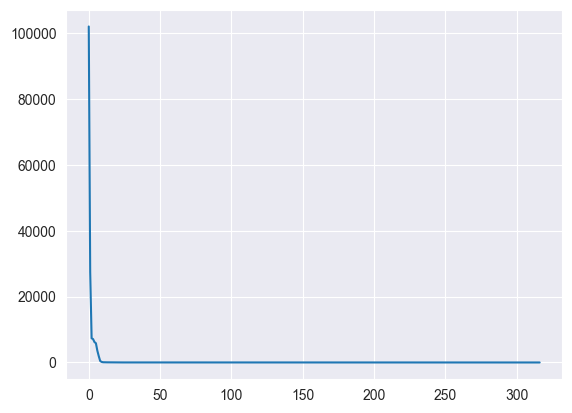

In [105]:
# an alternative method to check the #samples in each category
plt.plot(data_df['Type'].value_counts().values)

In [106]:
# a closer look at the #samples in each category
data_df['Type'].value_counts().values

array([102040,  27443,   7346,   7108,   6199,   5849,   3605,   1922,
          463,    176,     76,     56,     51,     48,     42,     27,
           21,     19,     19,     19,     18,     15,     14,     14,
           13,     13,     13,     12,     12,     12,     11,     11,
           10,     10,     10,      9,      9,      8,      8,      7,
            7,      7,      7,      7,      7,      6,      6,      6,
            6,      6,      6,      6,      6,      5,      5,      5,
            5,      5,      5,      5,      5,      5,      5,      4,
            4,      4,      4,      4,      4,      4,      4,      4,
            4,      4,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
      

According to the above observation, we take categories that only have a small #samples as outlier/minority categories. There are typically two ways to deal with the outliers: 
- We can directly **remove** the outlier categories
- We can also **merge** the minority categories with majority ones (example shown below)

In [107]:
# remove samples whose "Type" belongs to the minority categories 
# our criteria here is to remove categories that have less than 10 samples
value_cts = data_df['Type'].value_counts()
cat_to_remove = value_cts[value_cts < 10].keys()
cat_to_remove

CategoricalIndex(['RURLRES', 'Full',
                  'Luxury, New Construction, Mid-Rise (4-8)',
                  'SINGLE, RURLRES', '4+ Story', 'Apartments', '2 Story, Full',
                  'Junior', '1 Story', 'Luxury, 2 Level',
                  ...
                  '1 Level, Top Floor, Unit Below, Flat', 'Leased Land',
                  '1 Level, Top Floor, Unit Below',
                  '1 Level, Top Floor, Low-Rise (1-3), Full, Attached',
                  'Low-Rise (1-3), End Unit',
                  'Low-Rise (1-3), Full, Unit Above',
                  'Low-Rise (1-3), Ground Floor', 'Low-Rise (1-3), Live/Work',
                  'Low-Rise (1-3), Semi-Attached', 'Hi-Rise (9+), Studio'],
                 categories=['1 Level', '1 Level, Attached', '1 Level, Flat', '1 Level, Flat, Low-Rise (1-3)', ..., 'Unit Below, Low-Rise (1-3), Unit Above', 'Unknown', 'Vacant Land', 'VacantLand'], ordered=False, dtype='category', name='Type', length=282)

In [108]:
print("Data size before dropping minority categories:", data_df.shape)
data_df.drop(data_df[data_df['Type'].isin(cat_to_remove)].index, inplace=True)
print("Data size after dropping minority categories:", data_df.shape)

Data size before dropping minority categories: (164944, 32)
Data size after dropping minority categories: (164401, 32)


In [109]:
# double check the remaining categories 
data_df['Type'].astype('string').value_counts()

# check what happens if not using astype('string') in the above expression?

Type
SingleFamily            102040
Condo                    27443
MultiFamily               7346
Townhouse                 7108
VacantLand                6199
Unknown                   5849
MobileManufactured        3605
Apartment                 1922
Single Family              463
Cooperative                176
Residential Lot             76
Single Family Lot           56
MFD-F                       51
Acreage                     48
2 Story                     42
3 Story                     27
Hi-Rise (9+), Luxury        21
Duplex                      19
RESIDENTIAL                 19
Condominium                 19
Mid-Rise (4-8)              18
31                          15
Vacant Land                 14
Hi-Rise (9+)                14
Low-Rise (1-3)              13
Detached                    13
Manufactured Home           13
Mobile Home                 12
3 Story, Duplex             12
Detached, 2 Story           12
Top Floor                   11
Residential Sub Lot         11
ACR

In [110]:
# merge minority categories with majority ones (e.g., SINGLE --> SingleFamily, Lots/Land-->VacantLand)
data_df['Type'].replace(['SINGLE', 'Lots/Land'],['SingleFamily', 'VacantLand'], inplace=True)

In [111]:
# In the resulting categories, 'SINGLE' is merged with "SingleFamily" and 'Lots/Land' is merged with 'VacantLand'
data_df['Type'].value_counts()

Type
SingleFamily                                    102050
Condo                                            27443
MultiFamily                                       7346
Townhouse                                         7108
VacantLand                                        6209
                                                 ...  
Detached, Fixer Upper                                0
Detached, 4+ Story                                   0
Detached, 3 Story, Full                              0
Detached, 3 Story, Attached                          0
Hi-Rise (9+), Luxury, Unit Below, Unit Above         0
Name: count, Length: 315, dtype: int64

#### task-1 (2pts): categorical data processing
Please apply the logic for processing the "Type" column to process one of the following columns:
- Region
- Elementary School
- High School

*Notes:*
- You can decide whether to remove outliers or not and what specific threshold to use, based on your observation and common sense. 
- You can also decide whether it makes sense to merge multiple categories.
- Please write down your thoughts as comments in the corresponding code cell.

In [112]:
# count the number of each category in 'High School' column
data_df['High School'].value_counts()

High School
Fairfax Senior High School               3600
University Senior High School Charter    3503
Independence High School                 2911
Harbor High School                       2373
Belmont Senior High School               2124
                                         ... 
Fortuna Union High School                   1
Felicitas And Gonzalo Mendez High           1
Douglas County High School                  1
Charles D. Jones Junior High School         1
www.greatschools.org                        1
Name: count, Length: 946, dtype: int64

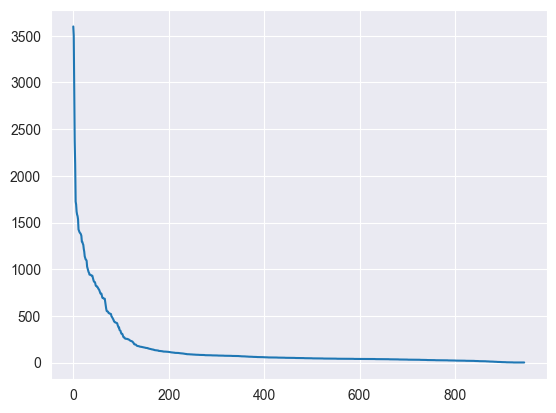

In [113]:
# use a plot to check the number of samples in each category
plt.plot(data_df['High School'].value_counts().values)

In [114]:
# a closer look at the number of samples in each category
data_df['High School'].value_counts().values

array([3600, 3503, 2911, 2373, 2124, 1725, 1693, 1617, 1586, 1569, 1535,
       1426, 1411, 1398, 1389, 1384, 1374, 1357, 1295, 1293, 1274, 1261,
       1218, 1188, 1138, 1122, 1104, 1101, 1090, 1028, 1010,  988,  971,
        962,  942,  941,  940,  935,  935,  931,  930,  908,  889,  872,
        864,  863,  851,  827,  820,  820,  810,  808,  797,  787,  783,
        768,  755,  740,  739,  738,  718,  694,  694,  688,  687,  684,
        684,  649,  609,  577,  553,  549,  548,  543,  531,  529,  525,
        525,  521,  520,  497,  489,  481,  470,  462,  447,  437,  436,
        429,  428,  428,  425,  421,  402,  388,  376,  376,  349,  345,
        340,  321,  309,  309,  305,  291,  274,  271,  270,  259,  257,
        255,  255,  254,  254,  250,  250,  248,  244,  239,  236,  233,
        232,  230,  227,  225,  217,  214,  203,  195,  194,  194,  193,
        187,  181,  179,  176,  176,  176,  174,  171,  170,  170,  169,
        168,  167,  166,  164,  163,  162,  161,  1

In [115]:
# remove samples whose "Region" belongs to the minority categories
# remove categories that have less than 10 samples
value_cts = data_df['High School'].value_counts()
cat_to_remove = value_cts[value_cts < 10].keys()
cat_to_remove

CategoricalIndex(['Garfield High School', 'Holtville High School',
                  'Arleta High School', 'Cascade High School', 'Rise High',
                  'Sierra Vista High School',
                  'Oakview High (Alternative) School', 'Rubidoux High School',
                  'Ella Barkley High School', 'Whale Gulch High School',
                  'Panorama High School', 'Big Picture High School - Fresno',
                  'Peninsula High (Continuation)', 'Mcclymonds High School',
                  'Soquel High School', 'Tioga High School',
                  'New Highland Academy', 'Don Pedro High School',
                  'Linda Esperanza Marquez High A Huntington Park Institute Of Applied Medicine',
                  'Anderson High School', 'Nu Tech High School',
                  'Rare Earth High (Continuation) School',
                  'Piedmont High School', 'Desert Junior-Senior High School',
                  'Mountain Lakes High School', 'Yosemite High School',
    

In [116]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df['High School'].isin(cat_to_remove)].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (164401, 32)
Data size after dropping: (164176, 32)


In [117]:
# double-check the remaining categories
data_df['High School'].astype('string').value_counts()

High School
Fairfax Senior High School               3600
University Senior High School Charter    3503
Independence High School                 2911
Harbor High School                       2373
Belmont Senior High School               2124
                                         ... 
Mira Monte High School                     11
Oakland Charter High School                10
Arise High School                          10
Garey High School                          10
Rosamond High School                       10
Name: count, Length: 881, dtype: Int64

**Analyze Home type**

In [118]:
# The category distribution for "Home type" seems reasonable 
# We will just use it as it is without further processing
data_df['Home type'].value_counts()

Home type
SingleFamily          102536
Condo                  27523
MultiFamily             7375
Townhouse               7094
Unknown                 5852
MobileManufactured      3616
Apartment               1923
Cooperative              176
Name: count, dtype: int64

#### process numerical data

In [119]:
num_col = ['Sold Price', 'Bathrooms', 'Total interior livable area', 'Total spaces', 'Garage spaces', 
           'Elementary School Score', 'Elementary School Distance', 'High School Score', 'High School Distance', 
           'Lot size', 'Tax assessed value', 'Annual tax amount', 'Listed Price']

Convert currency from string format (e.g., $1,000,000) to float. 

In [120]:
currency = ['Sold Price', 'Listed Price', 'Tax assessed value', 'Annual tax amount']
for c in currency:
    data_df[c] = data_df[c].replace(r'[$,-]', '', regex=True).replace(r'^\s*$', np.nan, regex=True).astype(float)

Convert areas from string format such as 1000 sqft and 1 Acres to float as well. 

In [121]:
areas = ['Total interior livable area', 'Lot size']
for c in areas:
    print(c)
    # attribute measured by Acres
    acres = data_df[c].str.contains('Acres') == True
    
    # e.g., 13,168 sqrt --> 13168
    col = data_df[c].replace(r'\b sqft\b|\b Acres\b|\b,\b','', regex=True).astype(float)
    
    # Acres --> sqft
    col[acres] *= 43560
    
    data_df[c] = col

Total interior livable area
Lot size


Now we can convert the numerical columns to the "float" data type 

In [122]:
data_df[num_col] = data_df[num_col].astype('float')
data_df[num_col]

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Lot size,Tax assessed value,Annual tax amount,Listed Price
0,2000000.0,2.0,2000.0,0.0,0.0,6.0,0.7,6.0,1.4,NaN,NaN,NaN,NaN
1,2100000.0,3.0,2806.0,2.0,2.0,9.0,0.4,9.0,1.2,13168.0,1829308.0,22330.0,1950000.0
2,1125000.0,2.0,1517.0,2.0,2.0,4.0,0.6,6.0,0.8,4795.0,1125000.0,13472.0,1299888.0
3,36250000.0,0.0,98052.0,175.0,175.0,7.0,0.4,9.0,0.9,178596.0,14521205.0,175211.0,NaN
4,140000.0,NaN,NaN,NaN,NaN,3.0,23.8,5.0,25.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164939,563527.0,2.0,959.0,0.0,0.0,3.0,2.5,2.0,1.3,2178.0,486031.0,8243.0,548000.0
164940,2650000.0,3.0,2400.0,2.0,2.0,6.0,0.5,NaN,NaN,53578.8,2757060.0,33279.0,2750000.0
164941,1357000.0,NaN,1355.0,2.0,2.0,7.0,1.2,8.0,2.1,1651.0,1356661.0,16427.0,NaN
164942,1400000.0,3.0,2227.0,0.0,0.0,7.0,2.0,4.0,6.2,5401.0,272767.0,4165.0,1398000.0


In [123]:
# the following columns now all have the numerical data types
data_df[num_col].dtypes

Sold Price                     float64
Bathrooms                      float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Elementary School Score        float64
Elementary School Distance     float64
High School Score              float64
High School Distance           float64
Lot size                       float64
Tax assessed value             float64
Annual tax amount              float64
Listed Price                   float64
dtype: object

Before moving forward, we will first deal with columns that contain missing values

In [124]:
# check the missing values of "Sold Price"
data_df['Sold Price'].isna().sum()

85

In [125]:
# we will drop samples where the "Sold Price" is missing
data_df.drop(data_df[data_df['Sold Price'].isna()].index, inplace=True)

In [126]:
# for the other numerical columns, we will fill in missing values with the mean of that column
for col in num_col:
    if col != "Sold Price":
        data_df[col].fillna(value = data_df[col].mean(), inplace=True)

In [127]:
# descriptive statistics for the numerical columns
data_df[num_col].describe()
# If the describe() function is applied on non-numerical columns, the statistics won't make sense.

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Lot size,Tax assessed value,Annual tax amount,Listed Price
count,1.640910e+05,164091.000000,1.640910e+05,164091.000000,164091.000000,164091.000000,164091.000000,164091.000000,164091.000000,1.640910e+05,1.640910e+05,1.640910e+05,1.640910e+05
mean,1.195188e+06,2.304861,3.189000e+03,1.709997,1.611407,5.654888,1.257959,6.090436,2.569901,9.551372e+05,8.899751e+05,1.123420e+04,1.197335e+06
std,3.342798e+06,1.528609,4.356450e+05,28.148837,28.129275,1.972267,2.712590,1.901002,3.805421,1.234872e+08,2.939352e+06,3.606312e+04,2.506554e+06
min,1.000000e+00,0.000000,1.000000e+00,-26.000000,-26.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.350000e+05,2.000000,1.218000e+03,0.000000,0.000000,4.000000,0.300000,5.000000,0.900000,5.222000e+03,2.964780e+05,4.014000e+03,5.990000e+05
50%,8.050000e+05,2.000000,1.672000e+03,1.000000,1.000000,5.654888,0.600000,6.090436,1.600000,7.683000e+03,6.690810e+05,8.757000e+03,1.150000e+06
75%,1.370000e+06,3.000000,2.580000e+03,2.000000,2.000000,7.000000,1.257959,7.000000,2.569901,7.187400e+04,9.442720e+05,1.201950e+04,1.197335e+06
max,8.660000e+08,256.000000,1.764164e+08,9999.000000,9999.000000,10.000000,76.400000,10.000000,77.800000,4.856770e+10,8.256328e+08,9.977342e+06,6.250000e+08


According to the descriptive statistics, multiple columns have outliers:
- Bathrooms, Total interior livable area, Total spaces, Garage spaces, Lot size

We will analyze them separately.

#### Analyze "Bathrooms"

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Bathrooms'>

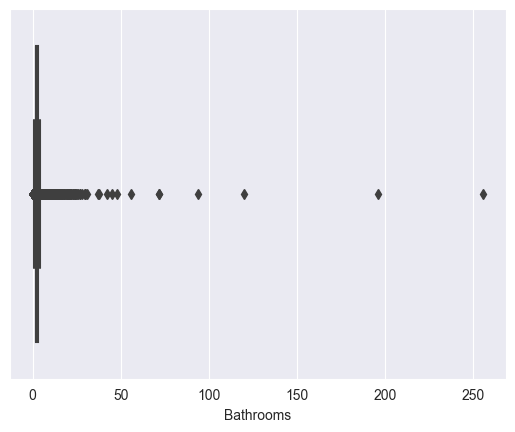

In [128]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Bathrooms'], orient='h')

Apply the concept introduced in the slides to calculate the following statistics of the boxplot

In [129]:
Q1 = data_df['Bathrooms'].quantile(0.25)
Q3 = data_df['Bathrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

2.0 3.0 0.5 4.5


In [130]:
# Based on the above calculation, we will remove samples that have "Bathrooms" strictly above 5 (>5) as outliers
data_df.drop(data_df[data_df['Bathrooms'] > 5].index, inplace=True)
data_df.shape

(161104, 32)

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Bathrooms', ylabel='Count'>

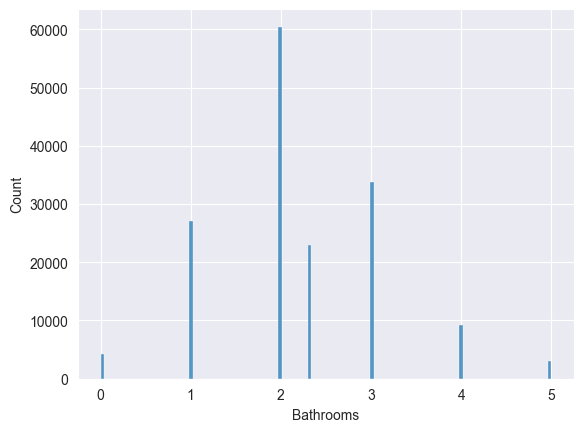

In [131]:
# check the new distribution of the "Bathrooms"
sns.histplot(data_df['Bathrooms'])

#### task-2 (2pts): numerical data processing 
Please apply the logic for processing the "Bathroom" column to process one of the following columns:
- Total interior livable area 
- Total spaces 
- Garage spaces 
- Lot size

*Notes:*
- You can decide the upper/lower threshold of removing outliers, it doesn't have to be the exact upper/lower threshold calculated from the boxplot. 

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Lot size'>

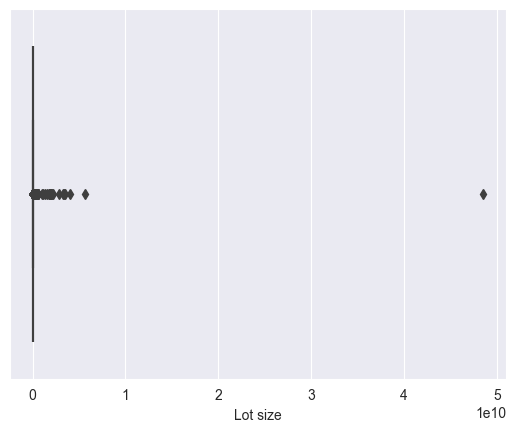

In [132]:
# draw boxplot to check outliers
sns.set_style("darkgrid", {'axis.grid': True})
sns.boxplot(x=data_df['Lot size'], orient='h')

In [133]:
Q1 = data_df['Lot size'].quantile(0.25)
Q3 = data_df['Lot size'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 0.5*IQR
higher_threshold = Q3 + 0.5*IQR
print(IQR)
print(Q1, Q3, lower_threshold, higher_threshold)

68852.0
5200.0 74052.0 -29226.0 108478.0


In [134]:
# based on calculation, remove samples that have lot size greater than 180,000
data_df.drop(data_df[data_df['Lot size']>110000].index, inplace=True)

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Lot size', ylabel='Count'>

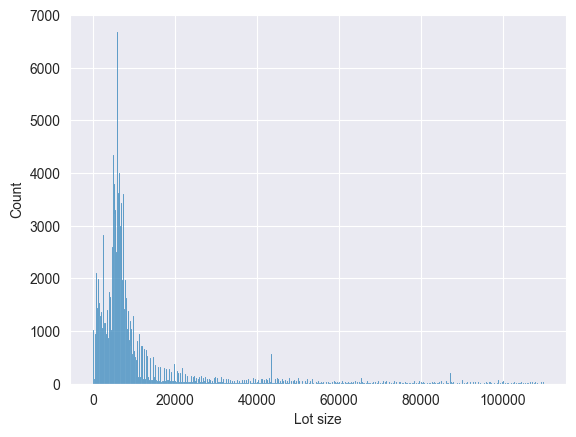

In [135]:
# check the new distribution of the 'Lot size'
sns.histplot(data_df['Lot size'])

**Example: analyze "Total interior livable area"**

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total interior livable area'>

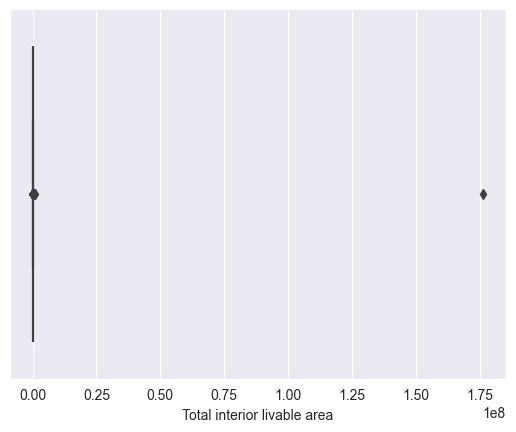

In [136]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['Total interior livable area'], orient='h')

In [137]:
Q1 = data_df['Total interior livable area'].quantile(0.25)
Q3 = data_df['Total interior livable area'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1218.0, 2263.0, -349.5, 3830.5)

In [138]:
data_df.shape

(123560, 32)

In [139]:
# Based on the above calculation, we will remove samples that have "Bathrooms" strictly above 5 (>5) as outliers
data_df.drop(data_df[data_df['Total interior livable area'] > 5000].index, inplace=True)
data_df.shape

(122239, 32)

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total interior livable area', ylabel='Count'>

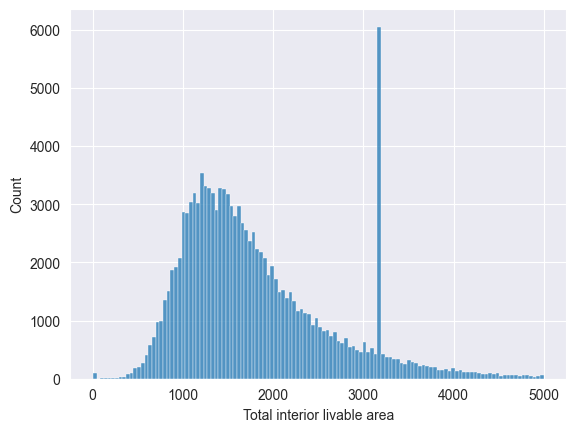

In [140]:
# check the new distribution of the "Total interior livable area"
sns.histplot(data_df['Total interior livable area'])

**Your analysis below**

From the histogram, we can infer several things about the distribution of the "Total interior livable area":

1. The data are right-skewed, meaning there is a long tail on the right side of the histogram. Most of the data points fall on the lower end of the area range.

2. The peak of the histogram is around 1200-1300, suggesting that the most common values for the livable area are low to mid-range, indicating that the mode and possibly the median are on the lower side.

3. There is a significant spike at one point around 3000. This spike suggests that there might be a group of very large homes that have a significantly larger total interior livable area compared to most of the dataset. The spike could also represent a data entry error or a different categorization of data. For instance, it may indicate a default value entered for missing data.

4. The majority of the data falls within a range of 0 to around 2500 square feet. There are very few homes with an area larger than this, up to the shown maximum of 5000 square feet.

### Data transformation
After performing data cleaning for each data type separately, we will move forward to do data transformation for each data type.

#### Normalize numerical data

In [141]:
# Total interior livable area, Total spaces, Garage spaces, Lot size

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total interior livable area', ylabel='Count'>

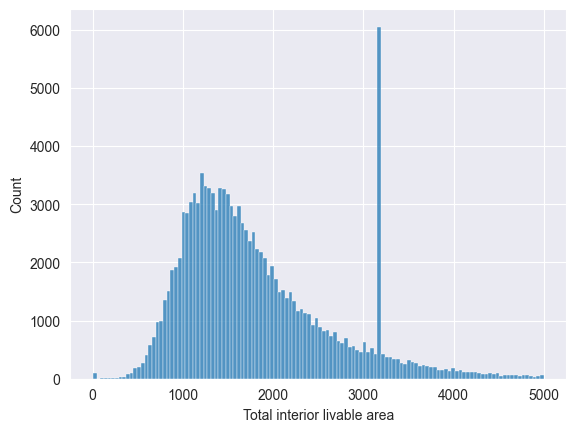

In [142]:
# check the distribution of the "Total interior livable area" (before normalization)
sns.histplot(data_df['Total interior livable area'])

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_df['Total interior livable area_normalized'] = scaler.fit_transform(data_df[['Total interior livable area']].values)

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total interior livable area_normalized', ylabel='Count'>

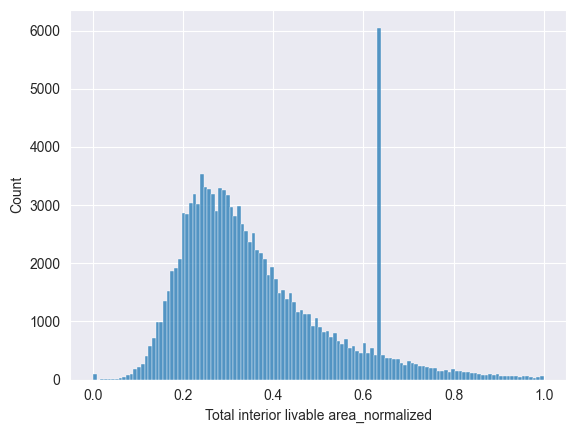

In [144]:
# check the distribution of the "Total interior livable area" (after normalization)
sns.histplot(data_df['Total interior livable area_normalized'])

Compare the data distribution before VS after normalization, we can see that:
- normalization does not change the shape and distribution of the data
- the absolute values of the data are changed, but the relative values do not change
- after normalization, it's more intuitive to understand the relative value among all samples

#### task-3 (3pts): normalize numerical data
please apply the logic for normalization of the "Total interior livable area" column to process one of the following columns:
- Total spaces 
- Garage spaces 
- Lot size

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Lot size', ylabel='Count'>

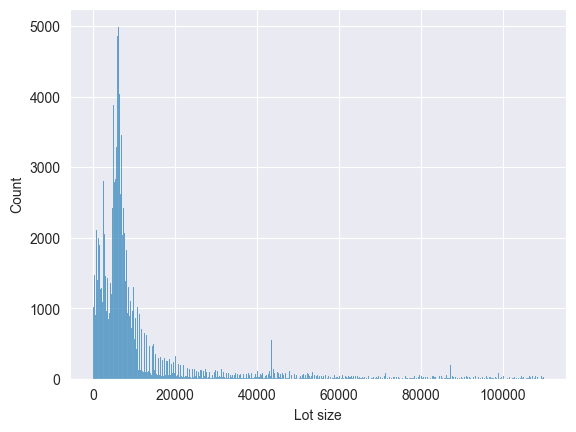

In [145]:
# check the distribution of the "Lot size" before normalization
sns.histplot(data_df['Lot size'])

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Lot size', ylabel='Count'>

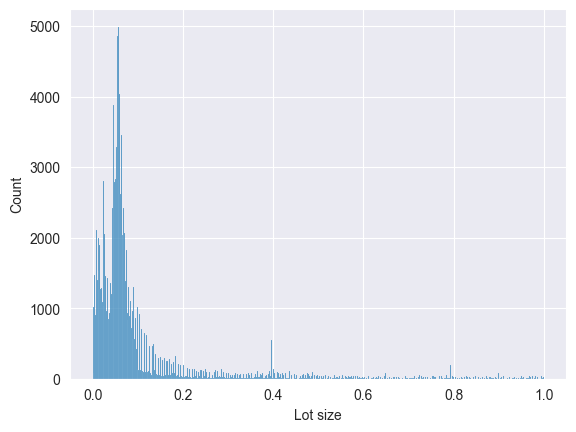

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_df['Lot size'] = scaler.fit_transform(data_df[['Lot size']].values)

# check the distribution of 'Lot size' after normalization
sns.histplot(data_df['Lot size'])

It can be seen that normalization does not change the shape and distribution of the data.

**Additional analysis**: for attributes with large values, we typically apply **log scaling** to process.

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


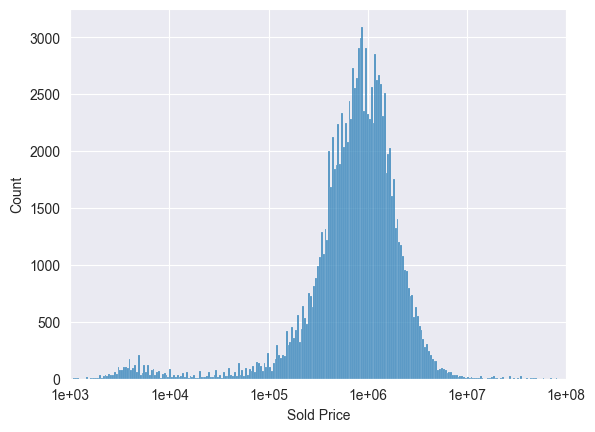

In [147]:
# Check the histogram of the 'Sold Price' after apply log scaling.
ax = sns.histplot(np.log10(data_df['Sold Price']))
ax.set_xlim([3, 8]) # set the limit of x-axis to be between 3 and 8
ax.set_xticks(range(3, 9))
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()]);

# feel free to explore what will happen without log scaling

The following plot is without log transformation. It can be seen that because of high skewness, the plot is rarely interpretable.

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sold Price', ylabel='Count'>

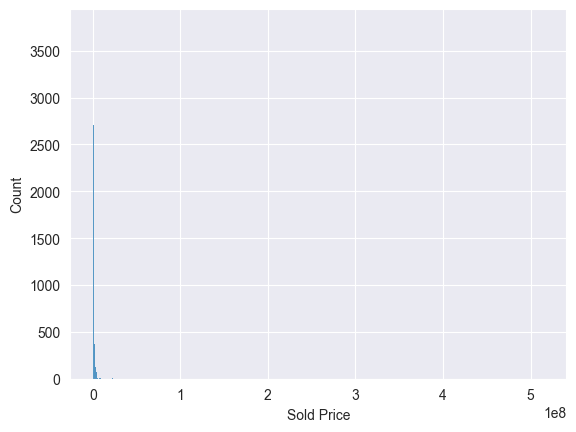

In [148]:
# plot 'Sold Price' without log transformation
sns.histplot(data_df['Sold Price'])

#### Text transformation 
- tokenization, stemming, lemmatization

In [149]:
import nltk

In [150]:
text_col = ['Address', 'Summary', 'Heating', 'Cooling', 'Parking', 'Heating features', 'Parking features']

In [151]:
data_df[text_col]

,Address,Summary,Heating,Cooling,Parking,Heating features,Parking features
1,"5281 Castle Rd,",Spectacular Mountain and incredible L.A. City ...,Central,"Central Air, Dual","Driveway, Driveway - Brick",Central,"Driveway, Driveway - Brick"
2,"3581 Butcher Dr,",Eichler Style home! with Santa Clara High! in ...,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered","Forced air, Gas","Garage, Garage - Attached, Covered"
5,"4707 La Villa Mari UNIT J,",AGENTS READ PRIVATE REMARKS BEFORE CALLING; S...,Central,None,Garage - Attached,Forced air,Garage - Attached
6,"7517 Deveron Ct,",This lovely rental is located in the prestigio...,"Forced air, Gas",Central,"Garage, Garage - Attached, Covered","Forced air, Gas","Garage, Garage - Attached, Covered"
7,"3025 E 8th St,","3025 E 8th St, Los Angeles, CA 90023 is a sing...",Wall,Wall/Window Unit(s),"Garage, Covered",Wall,"Garage, Covered"
...,...,...,...,...,...,...,...
164939,"88 Lakeshore Ct,",STUNNING LAKE VIEW AND BAY VIEW! Exquisite Res...,"Baseboard, Electric",None,"Carport, Covered, Guest","Baseboard, Electric","Carport, Covered, Guest"
164940,"3785 Wilshire Blvd PENTHOUSE 3,",Arguably the best unit at Solair. This top flo...,Central,Central,Covered,Other,Covered
164941,"312 Circuit Way,","312 Circuit Way, Mountain View, CA 94043 is a ...",Other,No Data,"Garage, Garage - Attached, Covered",Other,"Garage, Garage - Attached, Covered"
164942,"2 Cape Breton Ct,",Park Pacifica CHECK OUT THE VIDEO Entering Ca...,Central Forced Air - Gas,None,"Underground/Basement, Garage - Attached","Forced air, Gas","Underground/Basement, Garage - Attached"


#### Example analysis for the "Summary" column

**tokenization**: the process of breaking down text into the smallest unit in a sentence (e.g., tokens can be words, numbers, punctuation marks)

In [152]:
from nltk import sent_tokenize
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\11930\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\11930\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\11930\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [153]:
# take the "Summary" from the first sample as an example
text = data_df.iloc[0]['Summary']
text

'Spectacular Mountain and incredible L.A. City Skyline Views. This elegant building is located in a quiet residential area. A circular driveway leads you to this elegant beautiful home. This warm and private house features three bedrooms and three baths. Spacious formal Living room, dinning room and a high ceiling family room with a wet bar.  Remodeled  kitchen with granite counter top and cozy breakfast area. The sliding doors open to a very private backyard with generous deck,fire pit, swimming pool, Spa, grass area and LA views. The master bedroom and other two bedrooms on the one side of the house. Upper level loft perfect for a den or office with doors leading to the balcony you can enjoy the incredible view!'

In [154]:
nltk.sent_tokenize(text)

['Spectacular Mountain and incredible L.A. City Skyline Views.',
 'This elegant building is located in a quiet residential area.',
 'A circular driveway leads you to this elegant beautiful home.',
 'This warm and private house features three bedrooms and three baths.',
 'Spacious formal Living room, dinning room and a high ceiling family room with a wet bar.',
 'Remodeled  kitchen with granite counter top and cozy breakfast area.',
 'The sliding doors open to a very private backyard with generous deck,fire pit, swimming pool, Spa, grass area and LA views.',
 'The master bedroom and other two bedrooms on the one side of the house.',
 'Upper level loft perfect for a den or office with doors leading to the balcony you can enjoy the incredible view!']

In [155]:
print(nltk.word_tokenize(text))

['Spectacular', 'Mountain', 'and', 'incredible', 'L.A.', 'City', 'Skyline', 'Views', '.', 'This', 'elegant', 'building', 'is', 'located', 'in', 'a', 'quiet', 'residential', 'area', '.', 'A', 'circular', 'driveway', 'leads', 'you', 'to', 'this', 'elegant', 'beautiful', 'home', '.', 'This', 'warm', 'and', 'private', 'house', 'features', 'three', 'bedrooms', 'and', 'three', 'baths', '.', 'Spacious', 'formal', 'Living', 'room', ',', 'dinning', 'room', 'and', 'a', 'high', 'ceiling', 'family', 'room', 'with', 'a', 'wet', 'bar', '.', 'Remodeled', 'kitchen', 'with', 'granite', 'counter', 'top', 'and', 'cozy', 'breakfast', 'area', '.', 'The', 'sliding', 'doors', 'open', 'to', 'a', 'very', 'private', 'backyard', 'with', 'generous', 'deck', ',', 'fire', 'pit', ',', 'swimming', 'pool', ',', 'Spa', ',', 'grass', 'area', 'and', 'LA', 'views', '.', 'The', 'master', 'bedroom', 'and', 'other', 'two', 'bedrooms', 'on', 'the', 'one', 'side', 'of', 'the', 'house', '.', 'Upper', 'level', 'loft', 'perfect',

**Stemming**: apply rule-based method (e.g., cut the suffixes in words) to find the root of the word

In [156]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
word = ("leaves") 
ps.stem(word)

'leav'

**lemmatization**: use lexical based knowledge to get the base forms of words

In [157]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("leaves")

'leaf'

In [158]:
# combine tokenization and lemmatization together
word_list = nltk.word_tokenize(text)
word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
print(word_lem)

['Spectacular', 'Mountain', 'and', 'incredible', 'L.A.', 'City', 'Skyline', 'Views', '.', 'This', 'elegant', 'building', 'is', 'located', 'in', 'a', 'quiet', 'residential', 'area', '.', 'A', 'circular', 'driveway', 'lead', 'you', 'to', 'this', 'elegant', 'beautiful', 'home', '.', 'This', 'warm', 'and', 'private', 'house', 'feature', 'three', 'bedroom', 'and', 'three', 'bath', '.', 'Spacious', 'formal', 'Living', 'room', ',', 'dinning', 'room', 'and', 'a', 'high', 'ceiling', 'family', 'room', 'with', 'a', 'wet', 'bar', '.', 'Remodeled', 'kitchen', 'with', 'granite', 'counter', 'top', 'and', 'cozy', 'breakfast', 'area', '.', 'The', 'sliding', 'door', 'open', 'to', 'a', 'very', 'private', 'backyard', 'with', 'generous', 'deck', ',', 'fire', 'pit', ',', 'swimming', 'pool', ',', 'Spa', ',', 'grass', 'area', 'and', 'LA', 'view', '.', 'The', 'master', 'bedroom', 'and', 'other', 'two', 'bedroom', 'on', 'the', 'one', 'side', 'of', 'the', 'house', '.', 'Upper', 'level', 'loft', 'perfect', 'for',

### Feature Engineering

#### Numerical data
- directly use the values

#### Categorical data representation
- encoding (one-hot/ordinal encoder)

In [159]:
# we will use the "Home type" column as an example to show the encoding logics
data_df['Home type'].value_counts()

Home type
SingleFamily          90074
Condo                 14699
MultiFamily            5900
Townhouse              5851
Unknown                3585
Apartment              1117
MobileManufactured      976
Cooperative              37
Name: count, dtype: int64

In [160]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['Home type']])

OneHotEncoder(handle_unknown='ignore')

In [162]:
# the categories learned during the fit process
ohe.categories_

[array(['Apartment', 'Condo', 'Cooperative', 'MobileManufactured',
        'MultiFamily', 'SingleFamily', 'Townhouse', 'Unknown'],
       dtype=object)]

In [163]:
# encode the "Home type" with the learned categories during the fit process
ohe.transform(data_df[['Home type']]).toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0.])

In [164]:
# convert the original "Home type" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['Home type']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,Apartment,Condo,Cooperative,MobileManufactured,MultiFamily,SingleFamily,Townhouse,Unknown
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
122234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Date-time representation
- generate a corresponding feature list such as: [year, month, day]

In [165]:
data_col = ['Sold On', 'Year built', 'Listed On']

In [166]:
# we will use the "Sold On" column as an example to show the processing logics
data_df.iloc[:10]['Sold On']

1     02/25/21
2     11/06/19
5     02/24/21
6     08/31/19
7     11/06/19
8     01/30/21
10    01/13/21
11    12/18/20
12    04/30/20
14    09/03/20
Name: Sold On, dtype: object

In [167]:
# convert the column to DataTime type
data_df['Sold On'] = pd.to_datetime(data_df['Sold On'], infer_datetime_format=True)

C:\Users\11930\AppData\Local\Temp\ipykernel_21928\1496694987.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_df['Sold On'] = pd.to_datetime(data_df['Sold On'], infer_datetime_format=True)
C:\Users\11930\AppData\Local\Temp\ipykernel_21928\1496694987.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df['Sold On'] = pd.to_datetime(data_df['Sold On'], infer_datetime_format=True)


In [168]:
# extract year/month/day or other corresponding features
data_df['Sold_Year'] = data_df['Sold On'].apply(lambda time: time.year)
data_df['Sold_Month'] = data_df['Sold On'].apply(lambda time: time.month)
data_df['Sold_Day'] = data_df['Sold On'].apply(lambda time: time.day)

data_df[['Sold On', 'Sold_Year', 'Sold_Month', 'Sold_Day']]

,Sold On,Sold_Year,Sold_Month,Sold_Day
1,2021-02-25,2021,2,25
2,2019-11-06,2019,11,6
5,2021-02-24,2021,2,24
6,2019-08-31,2019,8,31
7,2019-11-06,2019,11,6
...,...,...,...,...
164939,2021-02-19,2021,2,19
164940,2018-05-31,2018,5,31
164941,2019-11-04,2019,11,4
164942,2020-07-23,2020,7,23


#### Text data representation
- vectorization
- embedding

In [169]:
from sklearn.feature_extraction.text import CountVectorizer

#### Let's take the "Summary" column to show an example.

In [170]:
# fill in missing values with empty string
data_df['Summary'].fillna(value='', inplace=True)

Take the "Summary" from top-100 samples to form a sample corpus, do tokenization and lemmatization

In [171]:
corpus = data_df.iloc[:100]['Summary']
corpus_lem = []
for text in corpus:
    word_list = nltk.word_tokenize(text)
    word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
    corpus_lem.append(' '.join(word_lem))

Vectorize the lemmatized corpus with multiple conditions set by the parameters. **Be careful about the parameter settings.**

In [172]:
vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1,1),binary=False,stop_words='english')
X = vectorizer.fit_transform(corpus_lem)

In [173]:
# check the feature matrix of the vectorized corpus
X.shape

(100, 270)

In [174]:
# check the extracted features during the vectorization
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['000', '2018', '2019', '2020', '280', '300', '400', '500',
       'access', 'added', 'additional', 'adu', 'air', 'amazing',
       'angeles', 'apple', 'appliance', 'area', 'attached', 'ave', 'away',
       'backyard', 'balcony', 'bath', 'bathroom', 'beach', 'beautiful',
       'beautifully', 'bedroom', 'bedrooms', 'best', 'block', 'boast',
       'brand', 'breakfast', 'bright', 'built', 'buyer', 'ca', 'cabinet',
       'car', 'carpet', 'ceiling', 'center', 'central', 'charming',
       'check', 'city', 'close', 'closet', 'come', 'community', 'commute',
       'complete', 'condo', 'contains', 'conveniently', 'counter',
       'countertop', 'covered', 'cozy', 'credit', 'cul', 'custom', 'deck',
       'den', 'desirable', 'detached', 'dining', 'distance', 'district',
       'door', 'double', 'downstairs', 'downtown', 'dr', 'drive',
       'driveway', 'dryer', 'dual', 'easy', 'elementary', 'enjoy',
       'entertaining', 'excellent', 'expansive', 'exterior', 'extra',
       'family',

Find out the top-10 most frequent features 

In [175]:
def get_topn_features(X, feature_names, topn=10):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []
    
    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})
    
    return pd.DataFrame(feature_freq)

In [176]:
get_topn_features(X, feature_names, topn=10)

,feature,frequency
0,new,99
1,room,98
2,bedroom,95
3,kitchen,70
4,bathroom,59
5,ha,56
6,living,56
7,family,55
8,bath,53
9,house,51


From the top-10 most frequent features, we observe that most houses describe the house conditions from the aspect of new, bedroom, bathroom, living, kitchen, floor. <br>
**However**, it is unclear why "ha" appears to be a frequent word. We need to find out documents that contain "ha" and explore the specific reason.

In [177]:
# find the index of "ha" from the feature list
np.where(feature_names == 'ha')

(array([109], dtype=int64),)

In [178]:
# find "ha" from the lemmatized corpus
np.array(corpus_lem)[np.where(X[:, 109].toarray() > 0)[0]][:2] # only select two samples for visualization purpose

array(['This lovely rental is located in the prestigious Villages Golf & Country Club , a 55+ community in the Evergreen area of Silicon Valley . Rent for 6 or 12 month .... perfect if you want to try out living in The Villages before buying , This home ha new carpet , 2 bedroom , 2 bath , kitchen with breakfast nook , granite counter , 2 pantry , 2 car garage with storage and a huge back patio for relaxing . The Villages offer many amenity like . . . 18 & 9 hole Golf course , 4 Swimming Pools & Spas , Tennis , Pickle-ball , Bocce , Billiards plus many Organized activity . Two restaurant with Clubhouse for fine dining and the Bistro for casual and patio dining ,',
       'This fabulous 2019 Brand Newly Built Traditional Cape Cod home captivates with spatial grandeur and top-tier finish for prime comfort . The impressive foyer open to a living room adjoining a study room . The open floor plan ha an expansive living , dining and family room with a fireplace . The custom designed gourmet 

In [179]:
# find "ha" from the raw corpus before tokenization and lemmatization
corpus.values[np.where(X[:, 109].toarray() > 0)[0]][:2] # only select two samples for visualization purpose

array(['This lovely rental is located in the prestigious Villages Golf & Country Club, a 55+ community in the Evergreen area of Silicon Valley. Rent for 6 or 12 months....perfect if you want to try out living in The Villages before buying, This home has new carpet, 2 bedrooms, 2 bath, kitchen with breakfast nook, granite counters, 2 pantries, 2 car garage with storage and a huge back patio for relaxing. The Villages offers many amenities like. . . 18 & 9 hole Golf courses, 4 Swimming Pools & Spas, Tennis, Pickle-ball, Bocce, Billiards plus many Organized activities. Two restaurants with Clubhouse for fine dining and the Bistro for casual and patio dining,',
       'This fabulous 2019 Brand Newly Built Traditional Cape Cod home captivates with spatial grandeur and top-tier finishes for prime comfort. The impressive foyer opens to a living room adjoining a study room. The open floor plan has an expansive living, dining and family room with a fireplace. The custom designed gourmet kitchen

In [180]:
# according to the above observation, it seems like "ha" is the lemma of "has"
lemmatizer.lemmatize('has')

'ha'

Based on the above exploration, we know that "ha" appears to be a frequent word, because it is lemmatized from "has", which is frequently used in the "Summary" description. <br>
According to our common sense, "ha" doesn't provide deeper understanding of the house's "Summary" information. So we can process it as a stop-word and remove it during the vectorization process.

In [181]:
# add self-defined stop-words
from sklearn.feature_extraction import text 
new_stop_words = text.ENGLISH_STOP_WORDS.union(['ha'])
# start from vectorization to repeat the above process 
# In real-world tasks, you might need to repeat the above process multiple times to remove unreasonable features

#### task-4 (3pts): text data representation
- In the above process, we showed the logics for doing text feature engineering, on 100 samples.
- In the following part, please apply the similar logic to process the "Summary" column for all samples. 
- Find out the top-20 most frequent words (you might repeat the process multiple times until the top-20 most frequent words make sense to you)

In [182]:
# take the 'Summary' column to form a corpus
corpus = data_df['Summary']
corpus_lem = []
for text in corpus:
    word_list = nltk.word_tokenize(text)
    word_lem = [lemmatizer.lemmatize(tok) for tok in word_list]
    corpus_lem.append(' '.join(word_lem))

In [183]:
# vectorize the lemmatized corpus with multiple conditions set by the parameters
vectorizer = CountVectorizer(min_df=0.001, max_df = 0.8, ngram_range=(1,1), binary = False, stop_words='english')
X = vectorizer.fit_transform(corpus_lem)

In [184]:
X.shape

(122239, 3891)

In [185]:
# check the extracted features using vectorization
feature_names = vectorizer.get_feature_names_out()
feature_names.shape

(3891,)

In [186]:
get_topn_features(X, feature_names, topn=20)

,feature,frequency
0,home,223155
1,bedroom,121835
2,room,120552
3,kitchen,82002
4,new,78881
5,bathroom,74297
6,living,67478
7,floor,66285
8,ha,64497
9,large,64176


It is observed that most rows describe house condition from perspectives of 'home', 'bedroom', 'kitchen', 'new', and 'bathroom', etc.
The word 'has' is still included if we include all the samples in the 'Summary' column. We can delete this term and try again.

In [187]:
# add self-defined stop-words
from sklearn.feature_extraction import text
new_stop_words = text.ENGLISH_STOP_WORDS.union(['ha'])

# repeat the above process from vectorization

# vectorize the lemmatized corpus with multiple conditions set by the parameters
vectorizer = CountVectorizer(min_df=0.001, max_df = 0.8, ngram_range=(1,1), binary = False, stop_words=list(new_stop_words))
X = vectorizer.fit_transform(corpus_lem)

# check the extracted features using vectorization
feature_names = vectorizer.get_feature_names_out()

get_topn_features(X, feature_names, topn=20)

,feature,frequency
0,home,223155
1,bedroom,121835
2,room,120552
3,kitchen,82002
4,new,78881
5,bathroom,74297
6,living,67478
7,floor,66285
8,large,64176
9,family,62166


After removing the stop word 'ha', another frequently appeared word 'space' is shown in the top 20 words.

### Additional Analysis (optional)

In [188]:
# Houses could have different types, here are the top types:
data_df['Type'].value_counts()[0:10]

Type
SingleFamily          89688
Condo                 14679
MultiFamily            5866
Townhouse              5853
Unknown                3584
Apartment              1116
MobileManufactured      972
Single Family           256
2 Story                  39
Cooperative              37
Name: count, dtype: int64

We want to calculate "price per living sqft" from the current features, an important measurement of final house price. Let's check the differences between different house types.

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


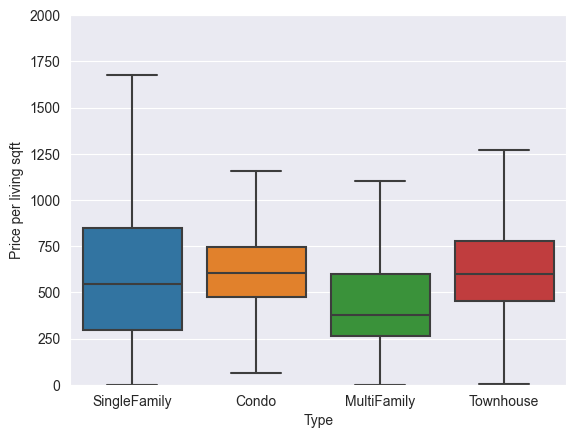

In [189]:
common_types = data_df['Type'].isin(['SingleFamily', 'Condo', 'MultiFamily', 'Townhouse'])
fitered_data_df = data_df[common_types]
data_df['Price per living sqft'] = data_df['Sold Price'] / data_df['Total interior livable area']
order = ['SingleFamily', 'Condo', 'MultiFamily', 'Townhouse']
ax = sns.boxplot(x='Type', y='Price per living sqft', data=data_df[common_types], fliersize=0,order=order)
ax.set_ylim([0, 2000]);

Sale price per living sqft is often related with house locations. Let's check the price for the top 20 zip codes.

In [190]:
data_df['Zip'].value_counts()[:20]

Zip
95118    760
95124    760
95135    753
94087    751
95148    744
95127    732
90002    730
95014    723
95129    720
95032    719
95132    719
90043    718
94116    717
90003    717
95122    714
95120    713
90047    713
95123    712
90011    711
90044    709
Name: count, dtype: int64

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


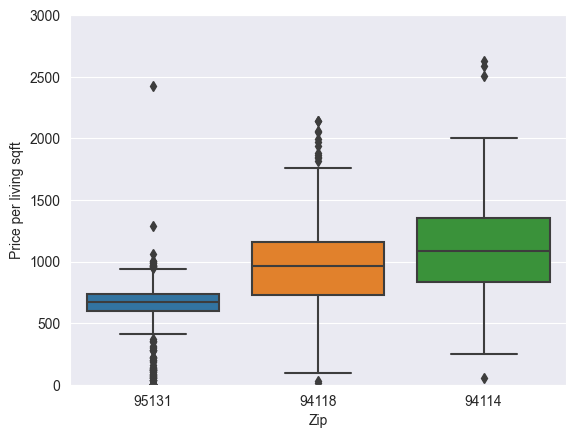

In [191]:
data_df['Zip'] = data_df['Zip'].astype('string')
data_df['Price per living sqft'] = data_df['Sold Price'] / data_df['Total interior livable area']
mask = data_df['Zip'].isin(['95131','94114', '94118'])
ax = sns.boxplot(x='Zip', y='Price per living sqft', data=data_df[mask])
ax.set_ylim([0, 3000]);

D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


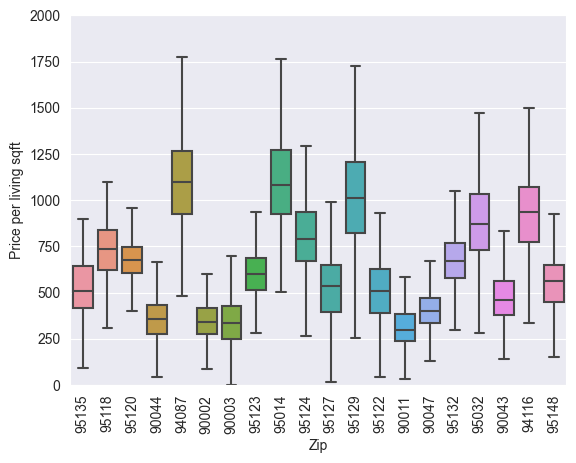

In [192]:
d = data_df[data_df['Zip'].isin(data_df['Zip'].value_counts()[:20].keys())]
ax = sns.boxplot(x='Zip', y='Price per living sqft', data=d, fliersize=0)
ax.set_ylim([0, 2000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In some cases, we also need to check the correlations among multiple columns:
- as a way to measure colinearty
- visualize the correlation matrix as a heatmap

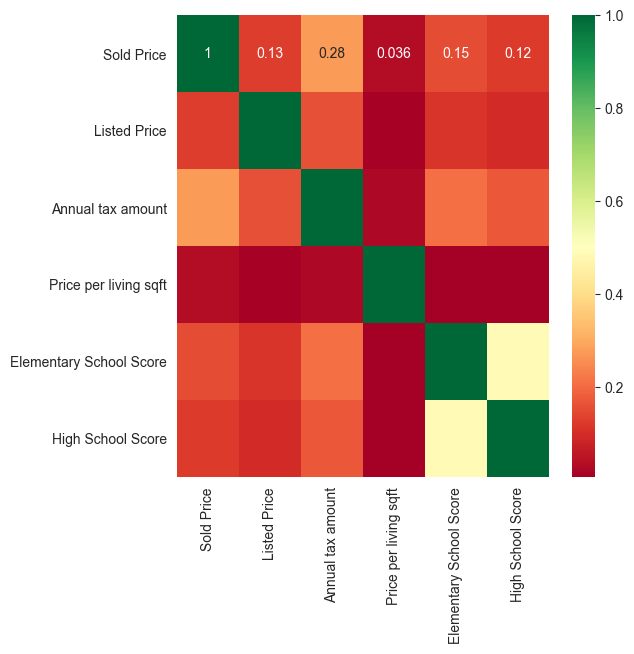

In [193]:
_, ax = plt.subplots(figsize=(6,6))
columns = ['Sold Price', 'Listed Price', 'Annual tax amount', 'Price per living sqft', 'Elementary School Score', 'High School Score']
sns.heatmap(data_df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

According to the heat map, we can observe that:
- sold price is not closely correlated with the listed price
- sold price has some correlation with the annual tax amount

**Optional free exploration**: do you have any additional EDA techniques to explore (if yes, please implement it below)

### Summary

This notebook demonstrates the basic technologies of doing data analysis for different data types, including

  - Data overview (understanding column data types, values, and distributions)
  - Data cleaning (remove missing values, outlier detection)
  - Data transformation (normalization, tokenization, lemmatization)
  - Feature engineering (encoding categorical data, text feature representation)
  - Understanding the interactions between columns (colinearty examination)

We only explored a small aspect of the data. You are welcome to dive deep into more details.